# Proyecto
 
La Ciudad de Buenos Aires se encuentra desarrollando un sistema de riego por camiones para proveer de agua a los árboles de la ciudad durante épocas de calor y sequía. El área de logística se encuentra analizando los mejores recorridos y que vehículo asignar para cada recorrido, en base a las características de cada especie y su ubicación. Para esto se le solicita al área de Ciencias de Datos que analice el dataset de arbolado público de la ciudad de Buenos Aires para responder las siguientes preguntas:
 
1. ¿Cuántas especies hay en cada comuna? 
2. ¿Qué especie es la más común en cada comuna y con cuantos ejemplares?
3. ¿Existe alguna relación entre el número de la comuna y el diámetro de los árboles? 
4. ¿Cual es el top 10 de especies que, en promedio, tienen mayor diámetro?¿En que calle hay más ejemplares de cada uno?
5. ¿Cual es la calle con más árboles?¿Por cuántas comunas pasa?
6. ¿Que caracteristica tiene la columna "calle_nombre"?¿y la columna "nivel_plantera"?
 
---------------------------------------
 
Realice una exposición de los resultados de estas preguntas, utilizando narrativa y gráficos


En el próximo bloque de código importo las librerias necesarias para el proyecto

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

En los próximos códigos importo el set de datos con el que vamos a trabajar

In [29]:
filesUploaded = files.upload()

Saving arbolado-publico-lineal-2017-2018.csv to arbolado-publico-lineal-2017-2018 (3).csv


In [36]:
trees = pd.read_csv(io.BytesIO(filesUploaded["arbolado-publico-lineal-2017-2018.csv"]))
trees

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000,1120,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300,1345,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800,848,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370175,NaN,NaN,546140,Lineal,15,919,Guevara,1000,1000.0,NaN,LD3,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,34.0,7.0
370176,NaN,NaN,546141,Lineal,15,919,Guevara,1000,1000.0,NaN,LD4,Melia azedarach,3.3,Ocupada,Regular,A nivel,45.0,8.0
370177,NaN,NaN,546142,Lineal,15,919,Guevara,1000,1000.0,NaN,LD5,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,60.0,8.0
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000,1000.0,NaN,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0


#**Teniendo todo listo, procedemos a realizar los ejercicios:**

##1. ¿Cuántas especies hay en cada comuna?

A continuación, en el siguiente código colocamos un Data Frame llamado Species. El cual es un subjunto del Data Frame original "trees".

In [ ]:
species = trees["nombre_cientifico"].value_counts()
Species = trees.loc[(trees["nombre_cientifico"].isin(species.index[species > 50])) & (trees["nombre_cientifico"] != "No identificado")]
Species.shape

(357926, 18)

Luego, procedemos a dibujar un gráfico para ver, aproximadamente, cuantas especies hay en cada comuna.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


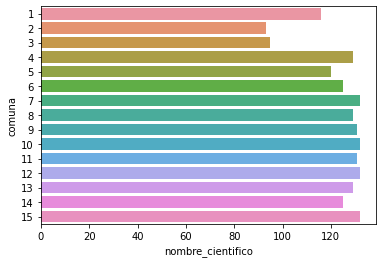

In [ ]:
Species["comuna"] = Species["comuna"].astype("category")
sns.barplot(
    x = "nombre_cientifico", y = "comuna",
    data = Species[["comuna", "nombre_cientifico"]].groupby("comuna").nunique().reset_index(drop = False)
)

Con el gráfico dibujado, podemos ver que hay, aproximadamente, 120 especies en cada comuna. Exceptuando las comunas 2 y 3, que varían entre 80 y 100.

¿Qué hicimos? Con el método *astype* cambiamos el tipo de columna *comuna* a una variable categórica ya que esta contiene números, por lo que python cree que es una medida. Luego creamos un DataFrame el cual tiene 2 columnas, uno es el nombre de la comuna y el otro es la cantidad de especies diferentes. Por último, con el método *groupby* agrupamos todas las filas que tengan igual comuna, en este caso.

Para hacer el gráfico, usamos el comando *sns.barplot* y colocamos nombre (nombre_cientifico), y comuna (comuna) en los respectivos ejes (X, Y).

##2. ¿Qué especie es la más común en cada comuna y con cuantos ejemplares?

Con los siguientes códigos, vamos a responder la pregunta.

In [ ]:
communes = trees [["nombre_cientifico", "comuna", "nro_registro"]].groupby(["comuna", "nombre_cientifico"]).count().reset_index(drop = False)
for c in communes ["comuna"].unique():
  commune = communes.loc[communes["comuna"] == c]
  print(commune.loc[commune["nro_registro"].idxmax()])

comuna                                    1
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                           4107
Name: 63, dtype: object
comuna                                    2
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                           2508
Name: 190, dtype: object
comuna                                    3
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                           7120
Name: 296, dtype: object
comuna                                    4
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                          15306
Name: 483, dtype: object
comuna                                    5
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                           6303
Name: 685, dtype: object
comuna                                    6
nombre_cientifico    Fraxinus pennsylvanica
nro_registro                           6058
Name: 863, dtype: object
comuna                                    7
nombre_cientifi

Para importar este código, primero creamos la variable *communes* que, mediante el dataset de arbolado, está compuesta por el nombre científico del arbol, la comuna y el número de registro. Luego, agrupamos (con el método *groupby* visto en el anterior ejercicio) todas las filas que tengan igual comuna y nombre científico. 

Usamos el comando *For* para ejecutar varias veces el mismo bloque de código para una lista de valores, en este caso son las comunas. 

Con el método loc filtramos un Data Frame que tenga el valor verdadero solo en las filas que queremos mantener, que son las comunas de la variable *communes*.

Por último, imprimimos ( o sea usamos el comando print) nuestra variable con el número de registro del árbol.

####**Teniendo estos datos, podemos decir que la especie más común en cada comuna es la Fraxinus pennsylvanica con un total de 133609 ejemplares**

##3. ¿Existe alguna relación entre el número de la comuna y el diámetro de los árboles?

Con el siguiente código, similar a los del anterior ejercicio, estaremos dibujando un gráfico en el cual podremos averiguar si existe dicha relación.

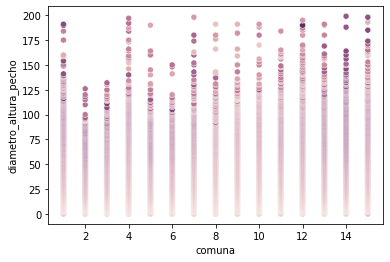

In [ ]:
heightCommunes = trees[["comuna", "altura_arbol", "diametro_altura_pecho"]].groupby(["comuna", "diametro_altura_pecho"]).mean()
heightCommunes.reset_index(drop = False, inplace = True)
plot = sns.scatterplot(
    data = heightCommunes, x = "comuna", y = "diametro_altura_pecho", hue = "altura_arbol",
    legend = False

)

Teniendo este gráfico, se puede ver que existe una relación entre el número de comuna y el diámetro de los árboles. Entonces, la respuesta a la pregunta es si.

##4. ¿Cuál es el top 10 de especies que, en promedio, tienen mayor diámetro?¿En qué calle hay más ejemplares de cada uno?

En el siguiente bloque, importo el código necesario para obtener los datos que nos permitirán responder la pregunta.

In [ ]:
species = trees[["nombre_cientifico", "diametro_altura_pecho"]].groupby("nombre_cientifico").mean()
species.sort_values(by = "diametro_altura_pecho", inplace = True, ascending = False)
pos = 1
for specie, row, in species[:10].iterrows():
  print("\nPos {}.".format(pos))
  print("{} con un diámetro de {}".format(specie, row.diametro_altura_pecho))
  street = trees.loc[trees["nombre_cientifico"] == specie, "calle_nombre"].value_counts().index[0]
  print("La mayor cantidad de ejemplares se encuentra en la calle {}".format(street))
  pos += 1


Pos 1.
Sterculia coccinea con un diámetro de 85.0
La mayor cantidad de ejemplares se encuentra en la calle Díaz Cnel. Av.

Pos 2.
Eucalyptus tereticornis con un diámetro de 81.8
La mayor cantidad de ejemplares se encuentra en la calle Irigoyen

Pos 3.
Salix alba con un diámetro de 80.5
La mayor cantidad de ejemplares se encuentra en la calle Santa Elena

Pos 4.
Tristania conferta con un diámetro de 76.0
La mayor cantidad de ejemplares se encuentra en la calle Superí

Pos 5.
Caryota urens con un diámetro de 75.0
La mayor cantidad de ejemplares se encuentra en la calle Jaramillo

Pos 6.
Ulmus sp. con un diámetro de 73.0
La mayor cantidad de ejemplares se encuentra en la calle Alvarez Jonte Av.

Pos 7.
Eucalyptus camaldulensis con un diámetro de 68.96116504854369
La mayor cantidad de ejemplares se encuentra en la calle Paz Gral. Av.

Pos 8.
Cocus nucifera con un diámetro de 65.0
La mayor cantidad de ejemplares se encuentra en la calle Bergantín Gral. Belgrano

Pos 9.
Eucalyptus robusta c

¿Como lo hicimos? Bueno, primero establecemos las columnas que vamos a utilizar a la variable *species*, que en este caso son "nombre_cientifico" y "diametro_altura_pecho". Agrupamos los datos de diametro_altura_pecho y usamos el metodo *.mean()* para obtener una media aritmética de esos datos.

Luego, empleamos el método *sort_values*, que lo que permite es ordenar el DataFrame en orden ascendente o descendente por los valores de la columna especificada a lo largo de cualquiera de los índices, aquí no es ascendente (o sea es False).

Pasamos al método For, que, como lo hemos explicado antes, sirve para ejecutar varias veces el mismo bloque de código para una lista de valores, en este caso ejecutaremos por cada especie, en filas, en los 10 primeros datos de la variable Species.

Por último, con print(), imprimimos el desarrollo de la respuesta, sin antes emplear los métodos *format*, que, según la definición de Python, devuelve una representación formateada de un valor dato controlado por el especificador de formato.

##5. ¿Cual es la calle con más árboles? ¿Por cuántas comunas pasa?

Como en los ejercicios anteriores, importamos el bloque de códigos necesario para poder responder, con los datos correspondientes, las preguntas del ejercicio.

In [ ]:
streets = trees[["calle_nombre", "nombre_cientifico"]].groupby("calle_nombre").count().reset_index(drop = False)
street = streets.loc[streets["nombre_cientifico"].idxmax()]
communes = trees.loc[trees["calle_nombre"] == street.calle_nombre,"comuna"].nunique()
"La calle con más árboles es {} con {} árboles, y pasa por {} comunas.".format(street.calle_nombre, street.nombre_cientifico, communes)

'La calle con más árboles es Del Libertador, Av con 1267 árboles, y pasa por 4 comunas.'

Este bloque de códigos es muy similar a los antes vistos, veamos que hicimos en orden:

1.   Del DataFrame *trees*, usamos las columnas "calle_nombre" y "nombre_cientifico" para nuestra nueva variable: *streets*.

2.   Agrupamos con el método *groupby* los datos de la columna "calle_nombre", y a su vez empleamos el comando *count()*

3.   Usamos el método *loc* para filtrar un DataFrame con la primera variable, sumando la función *idxmax*, que devuelve el índice del valor máximo en filas o columnas, que en este caso es "nombre_cientifico.

4.   Nuevamente crearemos otro DataFrame con el método visto en el paso anterior, pero con la diferencia de que agregaremos la columna "comuna" del df de trees.

5.   Por último, escribimos un texto formulando la respuesta, dejando espacios entre llaves para que, posteriormente, las rellenemos con los datos correspondientes, ¿Cómo lo hacemos? Utilizando el método *.format*, y luego ubicamos los datos necesarios en el orden correcto.

##6. ¿Que caracteristica tiene la columna "calle_nombre"? ¿y la columna "nivel_plantera"?

Importamos el bloque de códigos.

In [39]:
callenombre = tress["calle_nombre"].groupby("calle_nombre").count().reset_index(drop = False)

NameError: ignored

In [33]:
trees["calle_nombre"].describe()

count                 370087
unique                  2334
top       Del Libertador, Av
freq                    1267
Name: calle_nombre, dtype: object

In [32]:
trees["nivel_plantera"].describe()

count      368828
unique         26
top       A nivel
freq       232099
Name: nivel_plantera, dtype: object